In [1]:
import random
import seaborn
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import os
from PIL import Image
if torch.cuda.is_available():
    print(torch.cuda.device_count())
device = torch.device("cuda:0")
print(device)

3
cuda:0


In [2]:
import glob
import re
import json
from pathlib import Path

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything()

In [3]:
history = 1
batchsize = 200
testsize = 10
epochs = 300
allsensors = (
    'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5',
    'sensor6','sensor8', 'sensor9', 'sensor10',
    'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
    'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21')
fpath = '/proj/NARO/sonoda/orchid/Orchid_16_selected'

In [4]:
alldata = {}
def sensdata(name):
    jso = open("../sonoda/{}/all.json".format(name))
    jsl = json.load(jso)
    alldata[name] = jsl
for sname in allsensors:
    sensdata(sname)

In [9]:
files = glob.glob(fpath+'/*.jpg')
print(files)
sdata = []
fdata = []
tdata = []

for file in files:
    reres = re.findall('/proj/NARO/sonoda/orchid/Orchid_16_selected/data_(20\d\d)(\d\d)(\d\d)_(\d\d)(\d\d)(\d\d).jpg', file)
    (year, month, day, hour, minute, sec) = reres[0]
    dt_date = datetime(int(year), int(month), int(day), int(hour), int(minute), int(sec))
    dt_epoch = int(dt_date.timestamp()/60)*60
    dt_adj = datetime.fromtimestamp(dt_epoch)
    dt_prev = dt_adj
    time_adj = dt_adj.strftime('%Y-%m-%d-%H-%M')
    time_prev = time_adj
    
    dt_source = dt_adj + timedelta(minutes = history -1)
    time_source = dt_source.strftime('%Y-%m-%d-%H-%M')
    sensd = []
    histerr = 0
    for sname in allsensors:
        if alldata[sname].get(time_source):
            print('time_source', time_source)
            print(sname + 'の分データ', alldata[sname].get(time_source))
            sensd.append(alldata[sname][time_source]['Temperature'])
        else:
            print('no_data')
            histerr = 1
            break
    if histerr:
        continue
    if not histerr:
        sdata.append(sensd)
        tdata.append(time_adj)
        fdata.append(file)

['/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20211230_045455.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220101_201617.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20211229_000241.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220112_193520.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20211228_190227.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220111_080610.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220113_062810.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220115_104015.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220114_100430.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20211229_203439.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220107_222840.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220114_053338.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20220111_181649.jpg', '/proj/NARO/sonoda/orchid/Orchid_16_selected/data_20211228_1227

time_source 2022-01-12-23-55
sensor16の分データ {'Temperature': 17.44, 'Humidity': 72.4375, 'Pressure': 1006.2514686808576, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-12-23-55
sensor17の分データ {'Temperature': 17.74, 'Humidity': 70.8125, 'Pressure': 1006.8813611047532, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-23-55
sensor18の分データ {'Temperature': 16.78, 'Humidity': 71.9375, 'Pressure': 1006.198977645533, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-23-55
sensor19の分データ {'Temperature': 15.92, 'Humidity': 75.75, 'Pressure': 1006.7895017929351, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-12-23-55
sensor20の分データ {'Temperature': 16.06, 'Humidity': 73.421875, 'Pressure': 1006.6320286869611, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-23-55
sensor21の分データ {'Temperature': 16.14, 'Humidity': 71.984375, 'Pressure': 1007.1569390402075, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-12-00-33
sensor1の分データ {'Temperature': 34.44

sensor9の分データ {'Temperature': 19.1, 'Humidity': 72.984375, 'Pressure': 1020.0697337300679, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor10の分データ {'Temperature': 18.9, 'Humidity': 72.9375, 'Pressure': 1019.9516289005875, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor11の分データ {'Temperature': 19.86, 'Humidity': 73.578125, 'Pressure': 1019.8466468299382, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor12の分データ {'Temperature': 18.54, 'Humidity': 71.515625, 'Pressure': 1019.0461585412376, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-18-00
sensor13の分データ {'Temperature': 17.66, 'Humidity': 73.03125, 'Pressure': 1019.2036316472114, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-18-00
sensor14の分データ {'Temperature': 19.2, 'Humidity': 71.625, 'Pressure': 1019.0986495765621, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor15の分データ {'Temperature': 17.88, 'Humidity

sensor11の分データ {'Temperature': 24.6, 'Humidity': 57.46875, 'Pressure': 1004.3224231326772, 'UV': 1.211340206185567, 'AmbientLight': 3081.8965517241377}
time_source 2022-01-13-08-51
sensor12の分データ {'Temperature': 26.42, 'Humidity': 56.09375, 'Pressure': 1003.6925307087815, 'UV': 4.40721649484536, 'AmbientLight': 35538.793103448275}
time_source 2022-01-13-08-51
sensor13の分データ {'Temperature': 21.26, 'Humidity': 65.640625, 'Pressure': 1003.7975127794308, 'UV': 0.46391752577319584, 'AmbientLight': 991.3793103448276}
time_source 2022-01-13-08-51
sensor14の分データ {'Temperature': 18.68, 'Humidity': 70.53125, 'Pressure': 1003.6662851911193, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-08-51
sensor15の分データ {'Temperature': 21.28, 'Humidity': 64.75, 'Pressure': 1004.3617914091707, 'UV': 0.23195876288659792, 'AmbientLight': 883.6206896551723}
time_source 2022-01-13-08-51
sensor16の分データ {'Temperature': 18.82, 'Humidity': 71.328125, 'Pressure': 1003.5219348439765, 'UV': 0, 'AmbientLight': 64.6551724137

sensor16の分データ {'Temperature': 15.54, 'Humidity': 70.640625, 'Pressure': 1023.626001373312, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-02-03-22
sensor17の分データ {'Temperature': 17.36, 'Humidity': 70.234375, 'Pressure': 1024.1902800030518, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-02-03-22
sensor18の分データ {'Temperature': 15.64, 'Humidity': 69.09375, 'Pressure': 1023.5603875791562, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-02-03-22
sensor19の分データ {'Temperature': 14.8, 'Humidity': 73.15625, 'Pressure': 1024.1509117265582, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-02-03-22
sensor20の分データ {'Temperature': 15.16, 'Humidity': 70.765625, 'Pressure': 1023.9015793087663, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-02-03-22
sensor21の分データ {'Temperature': 15.42, 'Humidity': 68.4375, 'Pressure': 1024.5052262149998, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-16-11-00
sensor1の分データ {'Temperature': 31.98, 'Humidity': 40.9375, 'Pressure': 1018.0881

time_source 2022-01-15-21-43
sensor1の分データ {'Temperature': 25.04, 'Humidity': 36.890625, 'Pressure': 1020.1353475242237, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-21-43
sensor2の分データ {'Temperature': 17.06, 'Humidity': 72.5, 'Pressure': 1020.6340123598077, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-43
sensor3の分データ {'Temperature': 22.86, 'Humidity': 49.21875, 'Pressure': 1020.3978027008469, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-21-43
sensor4の分データ {'Temperature': 17.34, 'Humidity': 74.953125, 'Pressure': 1020.4240482185091, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-43
sensor5の分データ {'Temperature': 21.28, 'Humidity': 52.546875, 'Pressure': 1020.0959792477303, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-43
sensor6の分データ {'Temperature': 17.24, 'Humidity': 68.5, 'Pressure': 1020.7521171892881, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-21-43
sensor8の分データ {'Temperatur

time_source 2022-01-08-14-56
sensor4の分データ {'Temperature': 25.66, 'Humidity': 59.5, 'Pressure': 1020.1353475242237, 'UV': 0.15463917525773194, 'AmbientLight': 538.7931034482758}
time_source 2022-01-08-14-56
sensor5の分データ {'Temperature': 24.24, 'Humidity': 55.1875, 'Pressure': 1019.9385061417563, 'UV': 0.12886597938144329, 'AmbientLight': 129.3103448275862}
time_source 2022-01-08-14-56
sensor6の分データ {'Temperature': 23.9, 'Humidity': 58.90625, 'Pressure': 1020.4109254596781, 'UV': 0.10309278350515463, 'AmbientLight': 129.3103448275862}
time_source 2022-01-08-14-56
sensor8の分データ {'Temperature': 24.48, 'Humidity': 66.484375, 'Pressure': 1020.5552758068208, 'UV': 0.3092783505154639, 'AmbientLight': 1077.5862068965516}
time_source 2022-01-08-14-56
sensor9の分データ {'Temperature': 23.68, 'Humidity': 71.65625, 'Pressure': 1020.8308537422752, 'UV': 0.41237113402061853, 'AmbientLight': 1443.9655172413793}
time_source 2022-01-08-14-56
sensor10の分データ {'Temperature': 23.84, 'Humidity': 68.265625, 'Pressure'

time_source 2022-01-16-00-23
sensor21の分データ {'Temperature': 17.16, 'Humidity': 70.953125, 'Pressure': 1021.3557640955215, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-58
sensor1の分データ {'Temperature': 30.7, 'Humidity': 44.984375, 'Pressure': 1018.4556343938353, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-23-58
sensor2の分データ {'Temperature': 16.12, 'Humidity': 70.21875, 'Pressure': 1018.9149309529259, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-08-23-58
sensor3の分データ {'Temperature': 25.68, 'Humidity': 56.359375, 'Pressure': 1018.7443350881208, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-08-23-58
sensor4の分データ {'Temperature': 16.24, 'Humidity': 72.3125, 'Pressure': 1018.678721293965, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-23-58
sensor5の分データ {'Temperature': 20.94, 'Humidity': 57.5, 'Pressure': 1018.4818799114977, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-58
sen

time_source 2022-01-13-08-24
sensor18の分データ {'Temperature': 17.96, 'Humidity': 68.03125, 'Pressure': 1003.6925307087815, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-08-24
sensor19の分データ {'Temperature': 18.08, 'Humidity': 71.609375, 'Pressure': 1004.2174410620279, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-08-24
sensor20の分データ {'Temperature': 17.94, 'Humidity': 69.25, 'Pressure': 1004.0862134737164, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-08-24
sensor21の分データ {'Temperature': 18.28, 'Humidity': 67.84375, 'Pressure': 1004.5192645151445, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-14-19-59
sensor1の分データ {'Temperature': 34.42, 'Humidity': 33.921875, 'Pressure': 1012.0517280842298, 'UV': 0.02577319587628866, 'AmbientLight': 0}
no_data
time_source 2022-01-15-08-32
sensor1の分データ {'Temperature': 21.42, 'Humidity': 49.0625, 'Pressure': 1017.4845502403296

sensor11の分データ {'Temperature': 25.12, 'Humidity': 61.875, 'Pressure': 1011.5268177309835, 'UV': 0.02577319587628866, 'AmbientLight': 193.9655172413793}
time_source 2022-01-11-08-43
sensor12の分データ {'Temperature': 23.4, 'Humidity': 69.5, 'Pressure': 1010.7919432364386, 'UV': 0.10309278350515463, 'AmbientLight': 301.7241379310345}
time_source 2022-01-11-08-43
sensor13の分データ {'Temperature': 22.5, 'Humidity': 72.8125, 'Pressure': 1011.0281528953994, 'UV': 0.07731958762886597, 'AmbientLight': 280.17241379310343}
time_source 2022-01-11-08-43
sensor14の分データ {'Temperature': 20.44, 'Humidity': 73.265625, 'Pressure': 1010.7919432364386, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-08-43
sensor15の分データ {'Temperature': 22.64, 'Humidity': 72.625, 'Pressure': 1011.5399404898146, 'UV': 0.12886597938144329, 'AmbientLight': 215.51724137931032}
time_source 2022-01-11-08-43
sensor16の分データ {'Temperature': 20.22, 'Humidity': 75.140625, 'Pressure': 1010.6344701304646, 'UV': 0.02577319587628866, 'AmbientLight

time_source 2021-12-18-03-48
sensor19の分データ {'Temperature': 14.94, 'Humidity': 77.765625, 'Pressure': 1009.4665445944914, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-18-03-48
sensor20の分データ {'Temperature': 15.28, 'Humidity': 74.515625, 'Pressure': 1009.2172121766995, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-18-03-48
sensor21の分データ {'Temperature': 15.46, 'Humidity': 73.171875, 'Pressure': 1009.7421225299458, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
no_data
time_source 2022-01-08-16-27
sensor1の分データ {'Temperature': 19.98, 'Humidity': 59.28125, 'Pressure': 1019.9778744182498, 'UV': 0.02577319587628866, 'AmbientLight': 64.6551724137931}
time_source 2022-01-08-16-27
sensor2の分データ {'Temperature': 19.7, 'Humidity': 68.015625, 'Pressure': 1020.7652399481193, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-16-27
sensor3の分データ {'Temperature': 20, 'Humidity': 65.890625, 'Pressure': 1020.3059433890288, 'UV': 0, 'Ambi

time_source 2022-01-09-04-29
sensor18の分データ {'Temperature': 14.92, 'Humidity': 71.015625, 'Pressure': 1016.4609750514992, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-29
sensor19の分データ {'Temperature': 14.98, 'Humidity': 73.46875, 'Pressure': 1017.0383764400702, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-29
sensor20の分データ {'Temperature': 15.38, 'Humidity': 71.125, 'Pressure': 1016.7890440222782, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-04-29
sensor21の分データ {'Temperature': 15.74, 'Humidity': 68.3125, 'Pressure': 1017.3795681696803, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-10-25
sensor1の分データ {'Temperature': 33.92, 'Humidity': 37.640625, 'Pressure': 1008.1936369878691, 'UV': 0.8762886597938143, 'AmbientLight': 1056.0344827586207}
time_source 2022-01-14-10-25
sensor2の分データ {'Temperature': 27.4, 'Humidity': 57.296875, 'Pressure': 1008.8628976882582, 'UV': 0.38659793814432986, 'AmbientLight': 969.8275862068

time_source 2022-01-15-20-29
sensor14の分データ {'Temperature': 18.9, 'Humidity': 71.421875, 'Pressure': 1021.8019378957808, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-15-20-29
sensor15の分データ {'Temperature': 18.78, 'Humidity': 74.484375, 'Pressure': 1022.6680399786374, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-20-29
sensor16の分データ {'Temperature': 19.16, 'Humidity': 72.296875, 'Pressure': 1021.8281834134432, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-20-29
sensor17の分データ {'Temperature': 18.76, 'Humidity': 75.65625, 'Pressure': 1022.6024261844816, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-20-29
sensor18の分データ {'Temperature': 18.58, 'Humidity': 71.828125, 'Pressure': 1021.7756923781186, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-20-29
sensor19の分データ {'Temperature': 18.2, 'Humidity': 75.03125, 'Pressure': 1022.2349889372091, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-20-29
sensor20の分

sensor4の分データ {'Temperature': 16.98, 'Humidity': 80.421875, 'Pressure': 1017.5107957579919, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-10-00-03
sensor5の分データ {'Temperature': 22.78, 'Humidity': 61.71875, 'Pressure': 1017.3008316166934, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-00-03
sensor6の分データ {'Temperature': 17.7, 'Humidity': 70.859375, 'Pressure': 1017.8126192111085, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-00-03
sensor8の分データ {'Temperature': 18.74, 'Humidity': 76.671875, 'Pressure': 1017.9044785229266, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-00-03
sensor9の分データ {'Temperature': 18.22, 'Humidity': 78.921875, 'Pressure': 1018.2194247348745, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-10-00-03
sensor10の分データ {'Temperature': 18.96, 'Humidity': 77.515625, 'Pressure': 1018.0488288700694, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-00-03
sensor1

time_source 2022-01-11-06-09
sensor11の分データ {'Temperature': 18.48, 'Humidity': 79.671875, 'Pressure': 1014.3088426031892, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-06-09
sensor12の分データ {'Temperature': 17.68, 'Humidity': 77.984375, 'Pressure': 1013.4952315556573, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-06-09
sensor13の分データ {'Temperature': 17.1, 'Humidity': 79.0625, 'Pressure': 1013.6527046616312, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-11-06-09
sensor14の分データ {'Temperature': 18.16, 'Humidity': 78.453125, 'Pressure': 1013.6264591439689, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-06-09
sensor15の分データ {'Temperature': 17.02, 'Humidity': 79.40625, 'Pressure': 1014.3088426031892, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-06-09
sensor16の分データ {'Temperature': 17.88, 'Humidity': 80.3125, 'Pressure': 1013.390249485008, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_sour

no_data
time_source 2022-01-08-10-04
sensor1の分データ {'Temperature': 29.08, 'Humidity': 44.65625, 'Pressure': 1023.1010910200656, 'UV': 0.20618556701030927, 'AmbientLight': 409.4827586206896}
time_source 2022-01-08-10-04
sensor2の分データ {'Temperature': 26.86, 'Humidity': 59.28125, 'Pressure': 1023.8228427557793, 'UV': 0.25773195876288657, 'AmbientLight': 797.4137931034483}
time_source 2022-01-08-10-04
sensor3の分データ {'Temperature': 28.86, 'Humidity': 51.75, 'Pressure': 1023.4685282673381, 'UV': 0.6185567010309277, 'AmbientLight': 1508.6206896551723}
time_source 2022-01-08-10-04
sensor4の分データ {'Temperature': 25.86, 'Humidity': 60.734375, 'Pressure': 1023.4816510261692, 'UV': 0.25773195876288657, 'AmbientLight': 775.8620689655172}
time_source 2022-01-08-10-04
sensor5の分データ {'Temperature': 28.76, 'Humidity': 47.921875, 'Pressure': 1023.3241779201953, 'UV': 0.15463917525773194, 'AmbientLight': 301.7241379310345}
time_source 2022-01-08-10-04
sensor6の分データ {'Temperature': 24.56, 'Humidity': 56.390625, 

time_source 2022-01-09-07-51
sensor19の分データ {'Temperature': 16.82, 'Humidity': 70.25, 'Pressure': 1017.6945143816281, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-09-07-51
sensor20の分データ {'Temperature': 17.04, 'Humidity': 67.890625, 'Pressure': 1017.4845502403296, 'UV': 0.12886597938144329, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-07-51
sensor21の分データ {'Temperature': 17.48, 'Humidity': 65.625, 'Pressure': 1018.0488288700694, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-19-20
sensor1の分データ {'Temperature': 34.68, 'Humidity': 42.078125, 'Pressure': 1020.1878385595484, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-15-19-20
sensor2の分データ {'Temperature': 18.38, 'Humidity': 69.9375, 'Pressure': 1020.5683985656519, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-19-20
sensor3の分データ {'Temperature': 29.04, 'Humidity': 54.0625, 'Pressure': 1020.3978027008469, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 20

sensor11の分データ {'Temperature': 17.02, 'Humidity': 78.65625, 'Pressure': 1002.1834134431983, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-09
sensor12の分データ {'Temperature': 17.7, 'Humidity': 72.71875, 'Pressure': 1001.3698023956664, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-21-09
sensor13の分データ {'Temperature': 15.9, 'Humidity': 75.71875, 'Pressure': 1001.5141527428092, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-09
sensor14の分データ {'Temperature': 17.52, 'Humidity': 73.359375, 'Pressure': 1001.4616617074845, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-21-09
sensor15の分データ {'Temperature': 16.28, 'Humidity': 75.109375, 'Pressure': 1002.1046768902113, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-09
sensor16の分データ {'Temperature': 17.76, 'Humidity': 74.28125, 'Pressure': 1001.3698023956664, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-09
sensor17の分データ {'Temperature': 16.16, 'Humidity': 76.1875, 'Pressure': 1002.03

time_source 2022-01-08-08-13
sensor15の分データ {'Temperature': 20.24, 'Humidity': 62.296875, 'Pressure': 1024.032806897078, 'UV': 0.12886597938144329, 'AmbientLight': 452.5862068965517}
time_source 2022-01-08-08-13
sensor16の分データ {'Temperature': 19.04, 'Humidity': 64.734375, 'Pressure': 1023.1142137788968, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-08-13
sensor17の分データ {'Temperature': 20.42, 'Humidity': 62.96875, 'Pressure': 1023.9015793087663, 'UV': 0.20618556701030927, 'AmbientLight': 646.5517241379309}
time_source 2022-01-08-08-13
sensor18の分データ {'Temperature': 18.74, 'Humidity': 63.71875, 'Pressure': 1023.1404592965591, 'UV': 0.05154639175257732, 'AmbientLight': 86.20689655172413}
time_source 2022-01-08-08-13
sensor19の分データ {'Temperature': 18.18, 'Humidity': 67.796875, 'Pressure': 1023.6653696498055, 'UV': 0.07731958762886597, 'AmbientLight': 64.6551724137931}
time_source 2022-01-08-08-13
sensor20の分データ {'Temperature': 18.1, 'Humidity': 65.796875, 'Pressure': 1023.

time_source 2022-01-15-17-45
sensor14の分データ {'Temperature': 19.14, 'Humidity': 72.09375, 'Pressure': 1018.9674219882505, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-17-45
sensor15の分データ {'Temperature': 17.88, 'Humidity': 73.3125, 'Pressure': 1019.7285420004578, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-17-45
sensor16の分データ {'Temperature': 18.9, 'Humidity': 73.5, 'Pressure': 1018.8755626764324, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-15-17-45
sensor17の分データ {'Temperature': 17.82, 'Humidity': 74.40625, 'Pressure': 1019.6235599298085, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-15-17-45
sensor18の分データ {'Temperature': 18.72, 'Humidity': 72.140625, 'Pressure': 1018.8624399176013, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-17-45
sensor19の分データ {'Temperature': 18.64, 'Humidity': 74.890625, 'Pressure': 1019.334859235523, 'UV': 0.02577319587628866, 'AmbientLigh

sensor13の分データ {'Temperature': 14.6, 'Humidity': 74.90625, 'Pressure': 1008.3642328526741, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2021-12-18-03-14
sensor14の分データ {'Temperature': 15.04, 'Humidity': 74.046875, 'Pressure': 1008.3117418173495, 'UV': 0.10309278350515463, 'AmbientLight': 0}
time_source 2021-12-18-03-14
sensor15の分データ {'Temperature': 14.58, 'Humidity': 76.1875, 'Pressure': 1009.0466163118944, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2021-12-18-03-14
sensor16の分データ {'Temperature': 15.62, 'Humidity': 75.15625, 'Pressure': 1008.272373540856, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2021-12-18-03-14
sensor17の分データ {'Temperature': 14.76, 'Humidity': 76.921875, 'Pressure': 1008.7972838941024, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-18-03-14
sensor18の分データ {'Temperature': 15.44, 'Humidity': 73.921875, 'Pressure': 1008.2330052643625, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2021-12-18-03-14
sensor

time_source 2022-01-11-11-06
sensor5の分データ {'Temperature': 22.22, 'Humidity': 60.234375, 'Pressure': 1006.0808728160525, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-11-06
sensor6の分データ {'Temperature': 21.96, 'Humidity': 63.609375, 'Pressure': 1006.5795376516365, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-11-11-06
sensor8の分データ {'Temperature': 21.02, 'Humidity': 71.984375, 'Pressure': 1006.7238879987793, 'UV': 0.15463917525773194, 'AmbientLight': 517.2413793103448}
time_source 2022-01-11-11-06
sensor9の分データ {'Temperature': 22.72, 'Humidity': 71.5, 'Pressure': 1006.9994659342336, 'UV': 0.15463917525773194, 'AmbientLight': 517.2413793103448}
time_source 2022-01-11-11-06
sensor10の分データ {'Temperature': 21.02, 'Humidity': 73.140625, 'Pressure': 1006.8944838635844, 'UV': 0.20618556701030927, 'AmbientLight': 646.5517241379309}
time_source 2022-01-11-11-06
sensor11の分データ {'Temperature': 22.42, 'Humidity': 73.09375, 'Pressure': 1006.7632562

time_source 2022-01-15-22-05
sensor15の分データ {'Temperature': 15.58, 'Humidity': 77.671875, 'Pressure': 1021.0801861600671, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-22-05
sensor16の分データ {'Temperature': 17.2, 'Humidity': 74.375, 'Pressure': 1020.2928206301976, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-22-05
sensor17の分データ {'Temperature': 15.82, 'Humidity': 78.703125, 'Pressure': 1020.9489585717555, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-22-05
sensor18の分データ {'Temperature': 16.76, 'Humidity': 74.015625, 'Pressure': 1020.2665751125353, 'UV': 0.10309278350515463, 'AmbientLight': 0}
time_source 2022-01-15-22-05
sensor19の分データ {'Temperature': 16.56, 'Humidity': 76.703125, 'Pressure': 1020.8046082246128, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-22-05
sensor20の分データ {'Temperature': 16.52, 'Humidity': 75, 'Pressure': 1020.5683985656519, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-22-05
s

time_source 2022-01-13-23-00
sensor12の分データ {'Temperature': 19.6, 'Humidity': 72.9375, 'Pressure': 1002.9314106965744, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-23-00
sensor13の分データ {'Temperature': 17.98, 'Humidity': 77.078125, 'Pressure': 1003.0888838025483, 'UV': 0.10309278350515463, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-23-00
sensor14の分データ {'Temperature': 16.72, 'Humidity': 74.34375, 'Pressure': 1002.983901731899, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-23-00
sensor15の分データ {'Temperature': 18.34, 'Humidity': 76.296875, 'Pressure': 1003.7187762264439, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-23-00
sensor16の分データ {'Temperature': 16.6, 'Humidity': 75.390625, 'Pressure': 1002.8789196612497, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-23-00
sensor17の分データ {'Temperature': 18.54, 'Humidity': 76.390625, 'Pressure': 1003.5875486381323, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-23-00
sensor18の分データ {

time_source 2022-01-12-07-43
sensor4の分データ {'Temperature': 18.7, 'Humidity': 72.921875, 'Pressure': 1001.6060120546273, 'UV': 0.02577319587628866, 'AmbientLight': 172.41379310344826}
time_source 2022-01-12-07-43
sensor5の分データ {'Temperature': 19.88, 'Humidity': 60.421875, 'Pressure': 1001.3041886015106, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-12-07-43
sensor6の分データ {'Temperature': 19.28, 'Humidity': 64.25, 'Pressure': 1001.7897306782635, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
no_data
time_source 2022-01-11-17-07
sensor1の分データ {'Temperature': 19.96, 'Humidity': 70.640625, 'Pressure': 996.7243457694361, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-17-07
sensor2の分データ {'Temperature': 19.12, 'Humidity': 82.328125, 'Pressure': 997.44609750515, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-11-17-07
sensor3の分データ {'Temperature': 19.42, 'Humidity': 79.6875, 'Pressure': 996.9999

time_source 2022-01-15-10-19
sensor3の分データ {'Temperature': 24.94, 'Humidity': 54.609375, 'Pressure': 1018.6262302586405, 'UV': 0.25773195876288657, 'AmbientLight': 603.448275862069}
time_source 2022-01-15-10-19
sensor4の分データ {'Temperature': 24.66, 'Humidity': 61.53125, 'Pressure': 1018.7049668116274, 'UV': 0.41237113402061853, 'AmbientLight': 1379.310344827586}
time_source 2022-01-15-10-19
sensor5の分データ {'Temperature': 24.66, 'Humidity': 51.234375, 'Pressure': 1018.4818799114977, 'UV': 0.02577319587628866, 'AmbientLight': 258.6206896551724}
time_source 2022-01-15-10-19
sensor6の分データ {'Temperature': 24.16, 'Humidity': 55.125, 'Pressure': 1018.9280537117571, 'UV': 0.1804123711340206, 'AmbientLight': 366.37931034482756}
time_source 2022-01-15-10-19
sensor8の分データ {'Temperature': 26.52, 'Humidity': 58.0625, 'Pressure': 1019.1117723353933, 'UV': 1.3659793814432988, 'AmbientLight': 3297.413793103448}
time_source 2022-01-15-10-19
sensor9の分データ {'Temperature': 25.78, 'Humidity': 58.859375, 'Pressure'

time_source 2022-01-15-11-43
sensor4の分データ {'Temperature': 26.72, 'Humidity': 57.828125, 'Pressure': 1017.8126192111085, 'UV': 0.28350515463917525, 'AmbientLight': 1012.9310344827585}
time_source 2022-01-15-11-43
sensor5の分データ {'Temperature': 24.88, 'Humidity': 51.015625, 'Pressure': 1017.5632867933166, 'UV': 0.10309278350515463, 'AmbientLight': 150.86206896551724}
time_source 2022-01-15-11-43
sensor6の分データ {'Temperature': 25.58, 'Humidity': 52.234375, 'Pressure': 1018.0750743877318, 'UV': 0.02577319587628866, 'AmbientLight': 237.06896551724137}
time_source 2022-01-15-11-43
sensor8の分データ {'Temperature': 26.2, 'Humidity': 58.75, 'Pressure': 1018.2325474937056, 'UV': 0.6958762886597938, 'AmbientLight': 1767.2413793103447}
time_source 2022-01-15-11-43
sensor9の分データ {'Temperature': 24.36, 'Humidity': 59.84375, 'Pressure': 1018.5212481879912, 'UV': 0.41237113402061853, 'AmbientLight': 1637.9310344827584}
time_source 2022-01-15-11-43
sensor10の分データ {'Temperature': 26.14, 'Humidity': 59.640625, 'Pr

time_source 2022-01-08-03-26
sensor6の分データ {'Temperature': 15.44, 'Humidity': 63.375, 'Pressure': 1023.1010910200656, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-03-26
sensor8の分データ {'Temperature': 17.86, 'Humidity': 69.75, 'Pressure': 1023.1929503318837, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-03-26
sensor9の分データ {'Temperature': 21.9, 'Humidity': 61.953125, 'Pressure': 1023.3635461966888, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-03-26
sensor10の分データ {'Temperature': 17.34, 'Humidity': 71.71875, 'Pressure': 1023.2454413672084, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-08-03-26
sensor11の分データ {'Temperature': 24.64, 'Humidity': 56.078125, 'Pressure': 1023.219195849546, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-03-26
sensor12の分データ {'Temperature': 17.44, 'Humidity': 69.671875, 'Pressure': 1022.4580758373388, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 202

sensor9の分データ {'Temperature': 20.78, 'Humidity': 64.53125, 'Pressure': 1021.9462882429236, 'UV': 0.28350515463917525, 'AmbientLight': 1185.3448275862067}
time_source 2022-01-08-12-01
sensor10の分データ {'Temperature': 24.7, 'Humidity': 58.21875, 'Pressure': 1021.8937972075989, 'UV': 0.5927835051546391, 'AmbientLight': 1616.3793103448274}
time_source 2022-01-08-12-01
sensor11の分データ {'Temperature': 21.48, 'Humidity': 68.171875, 'Pressure': 1021.7756923781186, 'UV': 0.747422680412371, 'AmbientLight': 2823.275862068965}
time_source 2022-01-08-12-01
sensor12の分データ {'Temperature': 23.64, 'Humidity': 58.1875, 'Pressure': 1020.9620813305867, 'UV': 0.48969072164948446, 'AmbientLight': 1810.3448275862067}
time_source 2022-01-08-12-01
sensor13の分データ {'Temperature': 30.44, 'Humidity': 48.109375, 'Pressure': 1021.3426413366903, 'UV': 4.639175257731958, 'AmbientLight': 13836.206896551723}
time_source 2022-01-08-12-01
sensor14の分データ {'Temperature': 25.1, 'Humidity': 58.109375, 'Pressure': 1020.9489585717555, '

time_source 2022-01-13-16-01
sensor8の分データ {'Temperature': 19.82, 'Humidity': 77.265625, 'Pressure': 997.7085526817731, 'UV': 0.12886597938144329, 'AmbientLight': 538.7931034482758}
time_source 2022-01-13-16-01
sensor9の分データ {'Temperature': 22.76, 'Humidity': 74.703125, 'Pressure': 998.0234988937209, 'UV': 0.15463917525773194, 'AmbientLight': 387.9310344827586}
time_source 2022-01-13-16-01
sensor10の分データ {'Temperature': 19.68, 'Humidity': 77.625, 'Pressure': 997.9053940642405, 'UV': 0.20618556701030927, 'AmbientLight': 517.2413793103448}
time_source 2022-01-13-16-01
sensor11の分データ {'Temperature': 21.1, 'Humidity': 78.75, 'Pressure': 997.8135347524224, 'UV': 0.1804123711340206, 'AmbientLight': 452.5862068965517}
time_source 2022-01-13-16-01
sensor12の分データ {'Temperature': 19.7, 'Humidity': 76.078125, 'Pressure': 996.9868009460594, 'UV': 0.1804123711340206, 'AmbientLight': 409.4827586206896}
time_source 2022-01-13-16-01
sensor13の分データ {'Temperature': 18.8, 'Humidity': 78.21875, 'Pressure': 997.

sensor1の分データ {'Temperature': 23.8, 'Humidity': 38.171875, 'Pressure': 1001.7634851606012, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-21-46
sensor2の分データ {'Temperature': 16.46, 'Humidity': 72.5, 'Pressure': 1002.3933775844969, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-46
sensor3の分データ {'Temperature': 22.08, 'Humidity': 50.34375, 'Pressure': 1002.0653086137179, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-46
sensor4の分データ {'Temperature': 16.72, 'Humidity': 74.625, 'Pressure': 1002.1965362020295, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-13-21-46
sensor5の分データ {'Temperature': 20.46, 'Humidity': 53.03125, 'Pressure': 1001.8684672312505, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-21-46
sensor6の分データ {'Temperature': 16.8, 'Humidity': 68.375, 'Pressure': 1002.5377279316396, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-21-46
sensor8の分データ {'Temperature': 17.54, 'Humidity': 72.15625, 'Pressure': 1002

time_source 2021-12-17-19-35
sensor4の分データ {'Temperature': 17.42, 'Humidity': 81.859375, 'Pressure': 994.1654077973602, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-35
sensor5の分データ {'Temperature': 17.38, 'Humidity': 72.890625, 'Pressure': 993.9423208972305, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-35
sensor6の分データ {'Temperature': 17.72, 'Humidity': 73.734375, 'Pressure': 994.3884946974899, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-35
sensor8の分データ {'Temperature': 17.98, 'Humidity': 82.59375, 'Pressure': 994.5065995269704, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-35
sensor9の分データ {'Temperature': 20.04, 'Humidity': 83.03125, 'Pressure': 994.8346684977492, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-19-35
sensor10の分データ {'Temperature': 18.12, 'Humidity': 84.8125, 'Pressure': 994.7034409094377, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-19-35
sensor11の分データ {'Temperature': 22.26, 'Hu

sensor14の分データ {'Temperature': 17.88, 'Humidity': 77.546875, 'Pressure': 1017.7470054169528, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-05-16
sensor15の分データ {'Temperature': 17.68, 'Humidity': 77.40625, 'Pressure': 1018.4425116350042, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-10-05-16
sensor16の分データ {'Temperature': 17.58, 'Humidity': 78.96875, 'Pressure': 1017.6289005874723, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-05-16
sensor17の分データ {'Temperature': 17.44, 'Humidity': 78.890625, 'Pressure': 1018.3244068055237, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-05-16
sensor18の分データ {'Temperature': 17.36, 'Humidity': 78.328125, 'Pressure': 1017.6420233463035, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-05-16
sensor19の分データ {'Temperature': 17.18, 'Humidity': 80.4375, 'Pressure': 1018.1931792172122, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-10-05-16
sensor20の分データ {'Temper

time_source 2022-01-09-03-09
sensor4の分データ {'Temperature': 15.3, 'Humidity': 71.609375, 'Pressure': 1017.2352178225376, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-09-03-09
sensor5の分データ {'Temperature': 16.64, 'Humidity': 57.5, 'Pressure': 1016.9071488517586, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-03-09
sensor6の分データ {'Temperature': 15.8, 'Humidity': 63.9375, 'Pressure': 1017.60265506981, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-03-09
sensor8の分データ {'Temperature': 18.02, 'Humidity': 68.078125, 'Pressure': 1017.6157778286412, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-03-09
sensor9の分データ {'Temperature': 20.68, 'Humidity': 60.765625, 'Pressure': 1017.9044785229266, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-03-09
sensor10の分データ {'Temperature': 17.82, 'Humidity': 69.75, 'Pressure': 1017.7470054169528, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-03-09
sensor11の分データ {'Temperature': 18.44, 'Humidity': 64.90625, 'Pr

no_data
time_source 2022-01-14-18-55
sensor1の分データ {'Temperature': 18.5, 'Humidity': 53.21875, 'Pressure': 1011.0019073777371, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-18-55
sensor2の分データ {'Temperature': 17.36, 'Humidity': 65.03125, 'Pressure': 1011.7499046311132, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-18-55
sensor3の分データ {'Temperature': 18.4, 'Humidity': 60.046875, 'Pressure': 1011.3430991073473, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-18-55
sensor4の分データ {'Temperature': 17.64, 'Humidity': 66.421875, 'Pressure': 1011.5399404898146, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-18-55
sensor5の分データ {'Temperature': 18.48, 'Humidity': 55.421875, 'Pressure': 1011.1725032425421, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-14-18-55
sensor6の分データ {'Temperature': 18.22, 'Humidity': 59.171875, 'Pressure': 1011.7499046311132, 'UV': 0.05154639175257732, 'AmbientLight': 0}
no_data
time_source 2022-01-11-11-27
s

sensor1の分データ {'Temperature': 35.44, 'Humidity': 34.453125, 'Pressure': 1021.486991683833, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor2の分データ {'Temperature': 18.3, 'Humidity': 70.6875, 'Pressure': 1021.7888151369497, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor3の分データ {'Temperature': 30.08, 'Humidity': 46.765625, 'Pressure': 1021.7232013427939, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor4の分データ {'Temperature': 18.32, 'Humidity': 73.34375, 'Pressure': 1021.4738689250019, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor5の分データ {'Temperature': 25.12, 'Humidity': 51.5, 'Pressure': 1021.3295185778592, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor6の分データ {'Temperature': 18.1, 'Humidity': 67.078125, 'Pressure': 1021.972533760586, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-15-20-24
sensor8の分データ {'Temperature': 19.44, 'Humidity': 71.03125, 'Pressure': 

time_source 2022-01-12-17-27
sensor2の分データ {'Temperature': 18.1, 'Humidity': 66.75, 'Pressure': 1004.8604562447547, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-12-17-27
sensor3の分データ {'Temperature': 18.86, 'Humidity': 63.828125, 'Pressure': 1004.4930189974823, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-17-27
sensor4の分データ {'Temperature': 18.32, 'Humidity': 67.96875, 'Pressure': 1004.5717555504692, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-12-17-27
sensor5の分データ {'Temperature': 18.86, 'Humidity': 58.8125, 'Pressure': 1004.309300373846, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-12-17-27
sensor6の分データ {'Temperature': 18.88, 'Humidity': 61.296875, 'Pressure': 1004.9391927977416, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-17-27
sensor8の分データ {'Temperature': 19.1, 'Humidity': 67.015625, 'Pressure': 1004.9785610742351, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-12-17-27
sensor9の分データ {'Temperature

sensor19の分データ {'Temperature': 23.66, 'Humidity': 74.015625, 'Pressure': 999.099565117876, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-12-29
sensor20の分データ {'Temperature': 23.5, 'Humidity': 72.640625, 'Pressure': 999.1389333943695, 'UV': 0.02577319587628866, 'AmbientLight': 150.86206896551724}
time_source 2022-01-13-12-29
sensor21の分データ {'Temperature': 24.96, 'Humidity': 66.296875, 'Pressure': 999.348897535668, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-05-19
sensor1の分データ {'Temperature': 16.18, 'Humidity': 56.15625, 'Pressure': 1004.0730907148852, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-05-19
sensor2の分データ {'Temperature': 15.36, 'Humidity': 71.515625, 'Pressure': 1004.8079652094301, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-05-19
sensor3の分データ {'Temperature': 15.84, 'Humidity': 64.375, 'Pressure': 1004.46677347982, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 202

sensor1の分データ {'Temperature': 17.32, 'Humidity': 62.96875, 'Pressure': 1014.5975432974747, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-04-12
sensor2の分データ {'Temperature': 16.82, 'Humidity': 78.234375, 'Pressure': 1015.293049515526, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-04-12
sensor3の分データ {'Temperature': 16.62, 'Humidity': 73.875, 'Pressure': 1014.9256122682536, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-11-04-12
sensor4の分データ {'Temperature': 16.28, 'Humidity': 82.890625, 'Pressure': 1015.0830853742275, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-04-12
sensor5の分データ {'Temperature': 17.14, 'Humidity': 68.078125, 'Pressure': 1014.8337529564355, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-04-12
sensor6の分データ {'Temperature': 17.4, 'Humidity': 72.078125, 'Pressure': 1015.4373998626688, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-04-12
sensor8の分データ {'Temperature': 1

sensor2の分データ {'Temperature': 16.16, 'Humidity': 76.921875, 'Pressure': 1000.5299458304722, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-12-04-27
sensor3の分データ {'Temperature': 16.56, 'Humidity': 70.3125, 'Pressure': 1000.1100175478751, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-04-27
sensor4の分データ {'Temperature': 16.2, 'Humidity': 78.96875, 'Pressure': 1000.2281223773556, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-12-04-27
sensor5の分データ {'Temperature': 16.58, 'Humidity': 66.234375, 'Pressure': 999.9919127183947, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-12-04-27
sensor6の分データ {'Temperature': 16.62, 'Humidity': 70.34375, 'Pressure': 1000.5693141069657, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
no_data
no_data
no_data
no_data
time_source 2022-01-15-09-52
sensor1の分データ {'Temperature': 27.76, 'Humidity': 44.34375, 'Pressure': 1018.4556343938353, 'UV': 0.6185567010309277, 'AmbientLight': 732.75862068965

time_source 2022-01-15-22-31
sensor19の分データ {'Temperature': 16.7, 'Humidity': 76.53125, 'Pressure': 1020.7258716716259, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-22-31
sensor20の分データ {'Temperature': 16.74, 'Humidity': 75.046875, 'Pressure': 1020.5159075303274, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-22-31
sensor21の分データ {'Temperature': 17.06, 'Humidity': 72.0625, 'Pressure': 1021.0539406424048, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-12-52
sensor1の分データ {'Temperature': 22.02, 'Humidity': 59.5, 'Pressure': 1002.5508506904707, 'UV': 0.07731958762886597, 'AmbientLight': 64.6551724137931}
time_source 2022-01-11-12-52
sensor2の分データ {'Temperature': 21.62, 'Humidity': 70.484375, 'Pressure': 1003.2857251850156, 'UV': 0.10309278350515463, 'AmbientLight': 668.103448275862}
time_source 2022-01-11-12-52
sensor3の分データ {'Temperature': 21.72, 'Humidity': 67.5, 'Pressure': 1002.8526741435874, 'UV': 0.15463917525773194, 'Ambi

time_source 2022-01-10-05-48
sensor2の分データ {'Temperature': 17.28, 'Humidity': 76.125, 'Pressure': 1018.5999847409781, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-10-05-48
sensor3の分データ {'Temperature': 17.66, 'Humidity': 74.15625, 'Pressure': 1018.2325474937056, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-10-05-48
sensor4の分データ {'Temperature': 16.72, 'Humidity': 81.03125, 'Pressure': 1018.3244068055237, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-05-48
sensor5の分データ {'Temperature': 17.84, 'Humidity': 66.4375, 'Pressure': 1018.0357061112383, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-10-05-48
sensor6の分データ {'Temperature': 17.72, 'Humidity': 70.109375, 'Pressure': 1018.6262302586405, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-10-05-48
sensor8の分データ {'Temperature': 19.64, 'Humidity': 75.703125, 'Pressure': 1018.7443350881208, 'UV': 0, 'AmbientLight': 0}
time_source 20

time_source 2022-01-13-12-50
sensor16の分データ {'Temperature': 22.84, 'Humidity': 72.90625, 'Pressure': 998.194094758526, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-12-50
sensor17の分データ {'Temperature': 23.24, 'Humidity': 71.46875, 'Pressure': 999.1126878767071, 'UV': 0.5412371134020618, 'AmbientLight': 1982.7586206896551}
time_source 2022-01-13-12-50
sensor18の分データ {'Temperature': 22.88, 'Humidity': 70.78125, 'Pressure': 998.2203402761883, 'UV': 0.10309278350515463, 'AmbientLight': 107.75862068965516}
time_source 2022-01-13-12-50
sensor19の分データ {'Temperature': 22.52, 'Humidity': 74.015625, 'Pressure': 998.6140230411231, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-12-50
sensor20の分データ {'Temperature': 22.1, 'Humidity': 73.1875, 'Pressure': 998.6271457999542, 'UV': 0.10309278350515463, 'AmbientLight': 150.86206896551724}
time_source 2022-01-13-12-50
sensor21の分データ {'Temperature': 23.52, 'Humidity': 67.3125, 'Pressure': 998.9814602883955, 'UV': 0.07731

time_source 2022-01-13-03-54
sensor13の分データ {'Temperature': 15.42, 'Humidity': 75.453125, 'Pressure': 1004.9785610742351, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-03-54
sensor14の分データ {'Temperature': 16.02, 'Humidity': 72.25, 'Pressure': 1005.0704203860532, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-03-54
sensor15の分データ {'Temperature': 16.04, 'Humidity': 75.46875, 'Pressure': 1005.7396810864424, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-03-54
sensor16の分データ {'Temperature': 16.14, 'Humidity': 72.96875, 'Pressure': 1004.8998245212482, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-03-54
sensor17の分データ {'Temperature': 16.72, 'Humidity': 75.890625, 'Pressure': 1005.542839703975, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-03-54
sensor18の分データ {'Temperature': 15.78, 'Humidity': 72.15625, 'Pressure': 1004.9260700389106, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-13-03-54
sensor19の分データ {'Temperature': 15

sensor11の分データ {'Temperature': 22.02, 'Humidity': 70.6875, 'Pressure': 1021.9069199664301, 'UV': 0.3608247422680412, 'AmbientLight': 1034.4827586206895}
time_source 2022-01-08-11-50
sensor12の分データ {'Temperature': 25.14, 'Humidity': 56.734375, 'Pressure': 1021.158922713054, 'UV': 1.1082474226804122, 'AmbientLight': 5754.310344827586}
time_source 2022-01-08-11-50
sensor13の分データ {'Temperature': 30.7, 'Humidity': 49.046875, 'Pressure': 1021.5263599603265, 'UV': 4.716494845360824, 'AmbientLight': 14806.03448275862}
time_source 2022-01-08-11-50
sensor14の分データ {'Temperature': 26.3, 'Humidity': 58.296875, 'Pressure': 1021.0801861600671, 'UV': 0.10309278350515463, 'AmbientLight': 150.86206896551724}
time_source 2022-01-08-11-50
sensor15の分データ {'Temperature': 27.3, 'Humidity': 53.65625, 'Pressure': 1021.815060654612, 'UV': 0.6958762886597938, 'AmbientLight': 2823.275862068965}
time_source 2022-01-08-11-50
sensor16の分データ {'Temperature': 25.4, 'Humidity': 61, 'Pressure': 1020.8833447775997, 'UV': 0.0773

time_source 2021-12-18-02-39
sensor8の分データ {'Temperature': 16.62, 'Humidity': 73.453125, 'Pressure': 1008.1017776760509, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-18-02-39
sensor9の分データ {'Temperature': 19.88, 'Humidity': 68.25, 'Pressure': 1008.3642328526741, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-18-02-39
sensor10の分データ {'Temperature': 16.9, 'Humidity': 75.21875, 'Pressure': 1008.2854962996872, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-18-02-39
sensor11の分データ {'Temperature': 22.76, 'Humidity': 62, 'Pressure': 1008.2986190585184, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2021-12-18-02-39
sensor12の分データ {'Temperature': 16.5, 'Humidity': 73.59375, 'Pressure': 1007.4718852521553, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-18-02-39
sensor13の分データ {'Temperature': 14.74, 'Humidity': 75.625, 'Pressure': 1007.7080949111162, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2021-12-18-02-39
sensor14の分データ {'Temperature': 15.46, 'Humidity': 74.015625, 'P

time_source 2022-01-15-16-51
sensor6の分データ {'Temperature': 19.94, 'Humidity': 64.421875, 'Pressure': 1018.7180895704586, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-15-16-51
sensor8の分データ {'Temperature': 22.48, 'Humidity': 74.140625, 'Pressure': 1018.9411764705883, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-15-16-51
sensor9の分データ {'Temperature': 25.92, 'Humidity': 64.3125, 'Pressure': 1019.1117723353933, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-16-51
sensor10の分データ {'Temperature': 22.08, 'Humidity': 75.765625, 'Pressure': 1019.1117723353933, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-16-51
sensor11の分データ {'Temperature': 24.42, 'Humidity': 63.421875, 'Pressure': 1018.9149309529259, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-15-16-51
sensor12の分データ {'Temperature': 21.94, 'Humidity': 74.671875, 'Pressure': 1018.2194247348745, 'UV': 0, 'AmbientLigh

In [13]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, transform=None):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
        self.data_num = len(tdata)
    def __len__(self):
        return self.data_num
    def __getitem__(self, idx):
        image = Image.open(fdata[idx])
#        if self.transform:
#            out_data = self.transform(image)
        out_data = np.array(image).reshape(16*18).astype(np.int32) 
        out_data = out_data*50/255
        return torch.Tensor(sdata[idx]), torch.Tensor(out_data) 
data_set = MyDataset()

In [15]:
def heatmapshow(data):
    im = Image.fromarray(data[0].numpy().reshape([16,18]).copy()*255/50)
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    plt.show()

In [21]:
train_size = len(data_set)*0.8
train_size

960.0

In [22]:
from torch.utils.data.dataset import Subset
def split_dataset(data_set, split_at, order=None):
    from torch.utils.data.dataset import Subset
    n_examples = len(data_set)
    if split_at < 0:
        raise ValueError('split_at must be non-negative')
    if split_at > n_examples:
        raise ValueError('split_at exceeds the dataset size')
    if order is not None:
        subset1_indices = order[0:split_at]
        subset2_indices = order[split_at:n_examples]
    else:
        subset1_indices = list(range(0,split_at))
        subset2_indices = list(range(split_at,n_examples))

    subset1 = Subset(data_set, subset1_indices)
    subset2 = Subset(data_set, subset2_indices)
    return subset1, subset2

def split_dataset_random(data_set, first_size, seed=0):
    order = np.random.RandomState(seed).permutation(len(data_set))
    return split_dataset(data_set, int(first_size), order)

In [23]:
test_dataset, data_set = split_dataset_random(data_set, testsize, seed=0)
train_dataset, val_dataset = split_dataset_random(data_set, train_size, seed=0)

test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
train_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=True)
val_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=False)

10
1190


In [26]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()
        self.fc1 = nn.Linear(xsize, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 16*18)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
model = NET().to(device)
model

NET(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=288, bias=True)
)

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
train_loss_list = []
val_loss_list = []
for epoch in range(epochs):
    
    model.train()
    train_running_loss = 0
    for batch_idx, (x, c) in enumerate(train_loader):
        x = x.to(device)
        c = c.to(device)
        optimizer.zero_grad()
        y = model(x)
        train_loss = criterion(y, c)
        train_running_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss)
    train_loss = train_running_loss / len(train_loader) 
    
    model.eval()
    val_running_loss = 0
    with torch.no_grad():
        for batch_idx, (x, c) in enumerate(val_loader):
            x = x.to(device)
            c = c.to(device)
            y = model(x)
            val_loss = criterion(y, c)
            val_running_loss += val_loss.item()
            val_loss_list.append(val_loss)

    if epoch == 0:
        best_epoch = epoch
        torch.save(model.state_dict(), 'model.pth')
        best_valid_loss = val_running_loss
    else:
        if best_valid_loss > val_running_loss:
            torch.save(model.state_dict(), f"model{epoch}.pth")
            best_valid_loss = val_running_loss
            best_epoch = epoch

    val_loss = val_running_loss / len(val_loader)  
    print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, train_loss, val_loss))
    
print('best_epoch', best_epoch)

epoch 0, loss: 981.9217 val_loss: 787.7656
epoch 1, loss: 505.8718 val_loss: 123.1709
epoch 2, loss: 174.3360 val_loss: 111.1944
epoch 3, loss: 73.3995 val_loss: 93.5775
epoch 4, loss: 92.0413 val_loss: 68.3657
epoch 5, loss: 66.2843 val_loss: 68.0537
epoch 6, loss: 57.4393 val_loss: 49.8397
epoch 7, loss: 51.4271 val_loss: 50.3544
epoch 8, loss: 49.4392 val_loss: 49.5325
epoch 9, loss: 47.8610 val_loss: 46.6187
epoch 10, loss: 46.5365 val_loss: 45.9979
epoch 11, loss: 46.0720 val_loss: 45.4659
epoch 12, loss: 45.0977 val_loss: 44.7853
epoch 13, loss: 44.4436 val_loss: 44.0649
epoch 14, loss: 43.6099 val_loss: 43.1112
epoch 15, loss: 42.6446 val_loss: 42.1335
epoch 16, loss: 41.7639 val_loss: 41.1207
epoch 17, loss: 40.7475 val_loss: 40.0723
epoch 18, loss: 39.5965 val_loss: 38.9539
epoch 19, loss: 38.5003 val_loss: 37.7853
epoch 20, loss: 37.1304 val_loss: 36.2864
epoch 21, loss: 35.7693 val_loss: 34.8170
epoch 22, loss: 34.2062 val_loss: 33.2569
epoch 23, loss: 32.7911 val_loss: 31.6

epoch 193, loss: 10.9779 val_loss: 10.8514
epoch 194, loss: 11.0359 val_loss: 11.0233
epoch 195, loss: 10.9837 val_loss: 10.8169
epoch 196, loss: 10.8461 val_loss: 10.7995
epoch 197, loss: 11.2667 val_loss: 10.9548
epoch 198, loss: 11.0995 val_loss: 10.7916
epoch 199, loss: 10.9684 val_loss: 10.9571
epoch 200, loss: 11.0474 val_loss: 11.0613
epoch 201, loss: 10.8666 val_loss: 10.7625
epoch 202, loss: 11.0835 val_loss: 11.0412
epoch 203, loss: 11.1240 val_loss: 11.5062
epoch 204, loss: 11.2498 val_loss: 10.6276
epoch 205, loss: 10.8759 val_loss: 11.4967
epoch 206, loss: 11.1005 val_loss: 10.6949
epoch 207, loss: 10.6701 val_loss: 10.6837
epoch 208, loss: 10.8579 val_loss: 10.8480
epoch 209, loss: 10.9386 val_loss: 10.6135
epoch 210, loss: 10.9486 val_loss: 11.3732
epoch 211, loss: 11.1222 val_loss: 10.5279
epoch 212, loss: 11.0104 val_loss: 11.0868
epoch 213, loss: 10.9986 val_loss: 10.9875
epoch 214, loss: 10.8549 val_loss: 11.2935
epoch 215, loss: 11.0110 val_loss: 10.4933
epoch 216, 

epoch 390, loss: 8.4536 val_loss: 8.2757
epoch 391, loss: 8.9598 val_loss: 7.9519
epoch 392, loss: 8.9265 val_loss: 7.7502
epoch 393, loss: 8.2025 val_loss: 7.7488
epoch 394, loss: 8.2401 val_loss: 8.9738
epoch 395, loss: 8.8408 val_loss: 10.0412
epoch 396, loss: 8.8381 val_loss: 9.3819
epoch 397, loss: 8.8045 val_loss: 7.9585
epoch 398, loss: 8.2918 val_loss: 7.9714
epoch 399, loss: 8.6148 val_loss: 9.2623
epoch 400, loss: 8.7604 val_loss: 9.1183
epoch 401, loss: 8.4530 val_loss: 8.3739
epoch 402, loss: 8.1713 val_loss: 7.6700
epoch 403, loss: 8.5474 val_loss: 7.8085
epoch 404, loss: 8.5265 val_loss: 9.0939
epoch 405, loss: 8.4345 val_loss: 9.5269
epoch 406, loss: 8.6978 val_loss: 7.7842
epoch 407, loss: 8.1580 val_loss: 7.6213
epoch 408, loss: 7.8699 val_loss: 8.3213
epoch 409, loss: 7.7971 val_loss: 7.5844
epoch 410, loss: 7.9476 val_loss: 7.6435
epoch 411, loss: 7.8818 val_loss: 7.6735
epoch 412, loss: 7.7603 val_loss: 7.5638
epoch 413, loss: 7.6948 val_loss: 7.6586
epoch 414, loss

epoch 590, loss: 8.0373 val_loss: 7.4866
epoch 591, loss: 6.8778 val_loss: 6.3979
epoch 592, loss: 6.4443 val_loss: 6.5525
epoch 593, loss: 6.6701 val_loss: 6.5138
epoch 594, loss: 6.5920 val_loss: 6.6849
epoch 595, loss: 6.8190 val_loss: 6.3917
epoch 596, loss: 6.7204 val_loss: 6.6851
epoch 597, loss: 6.8938 val_loss: 6.3064
epoch 598, loss: 6.3760 val_loss: 6.3274
epoch 599, loss: 6.3711 val_loss: 6.2681
epoch 600, loss: 6.3461 val_loss: 6.3554
epoch 601, loss: 6.5610 val_loss: 6.7325
epoch 602, loss: 6.5259 val_loss: 6.3775
epoch 603, loss: 6.3380 val_loss: 6.3314
epoch 604, loss: 6.3225 val_loss: 6.3429
epoch 605, loss: 6.3021 val_loss: 6.3572
epoch 606, loss: 6.2788 val_loss: 6.2738
epoch 607, loss: 6.3382 val_loss: 6.4872
epoch 608, loss: 6.4796 val_loss: 6.2473
epoch 609, loss: 6.4699 val_loss: 6.2386
epoch 610, loss: 6.3144 val_loss: 6.2245
epoch 611, loss: 6.4071 val_loss: 6.4228
epoch 612, loss: 6.2981 val_loss: 6.2274
epoch 613, loss: 6.3961 val_loss: 6.2070
epoch 614, loss:

epoch 790, loss: 6.5495 val_loss: 6.3020
epoch 791, loss: 6.4871 val_loss: 6.0823
epoch 792, loss: 6.2530 val_loss: 5.7340
epoch 793, loss: 5.9417 val_loss: 5.6532
epoch 794, loss: 5.7169 val_loss: 5.5598
epoch 795, loss: 5.7392 val_loss: 5.6207
epoch 796, loss: 5.5880 val_loss: 5.4711
epoch 797, loss: 5.5288 val_loss: 5.6639
epoch 798, loss: 5.5690 val_loss: 5.7688
epoch 799, loss: 5.6474 val_loss: 6.2029
epoch 800, loss: 6.0377 val_loss: 5.5068
epoch 801, loss: 5.5332 val_loss: 5.4166
epoch 802, loss: 5.5357 val_loss: 5.5008
epoch 803, loss: 5.4801 val_loss: 5.4639
epoch 804, loss: 5.5310 val_loss: 5.5103
epoch 805, loss: 5.7144 val_loss: 5.4959
epoch 806, loss: 5.5958 val_loss: 5.4198
epoch 807, loss: 5.5415 val_loss: 5.5253
epoch 808, loss: 5.7390 val_loss: 5.4247
epoch 809, loss: 5.8531 val_loss: 5.8366
epoch 810, loss: 5.7117 val_loss: 5.4605
epoch 811, loss: 5.4811 val_loss: 5.5434
epoch 812, loss: 5.6406 val_loss: 5.3828
epoch 813, loss: 5.5188 val_loss: 5.4674
epoch 814, loss:

epoch 990, loss: 5.0342 val_loss: 4.9023
epoch 991, loss: 5.0076 val_loss: 5.0511
epoch 992, loss: 5.0000 val_loss: 4.8829
epoch 993, loss: 5.1584 val_loss: 4.9253
epoch 994, loss: 4.9951 val_loss: 4.9060
epoch 995, loss: 5.0805 val_loss: 4.8826
epoch 996, loss: 5.8433 val_loss: 6.1264
epoch 997, loss: 5.8098 val_loss: 7.4586
epoch 998, loss: 6.2123 val_loss: 6.7959
epoch 999, loss: 6.0719 val_loss: 5.2206
epoch 1000, loss: 5.6229 val_loss: 5.0108
epoch 1001, loss: 5.7021 val_loss: 5.5786
epoch 1002, loss: 5.4045 val_loss: 6.1225
epoch 1003, loss: 5.7776 val_loss: 6.3259
epoch 1004, loss: 5.3846 val_loss: 4.9455
epoch 1005, loss: 4.8726 val_loss: 4.8466
epoch 1006, loss: 5.0347 val_loss: 4.8596
epoch 1007, loss: 4.9693 val_loss: 4.9401
epoch 1008, loss: 4.9704 val_loss: 5.5663
epoch 1009, loss: 5.3065 val_loss: 4.9740
epoch 1010, loss: 5.0092 val_loss: 5.8777
epoch 1011, loss: 5.2721 val_loss: 5.8285
epoch 1012, loss: 5.3458 val_loss: 6.4908
epoch 1013, loss: 5.6075 val_loss: 5.9341
ep

epoch 1186, loss: 4.5430 val_loss: 4.6332
epoch 1187, loss: 4.7658 val_loss: 5.0811
epoch 1188, loss: 4.9634 val_loss: 4.7702
epoch 1189, loss: 4.8661 val_loss: 4.6420
epoch 1190, loss: 4.7959 val_loss: 5.1613
epoch 1191, loss: 4.7282 val_loss: 4.7368
epoch 1192, loss: 4.8343 val_loss: 5.8921
epoch 1193, loss: 5.4348 val_loss: 5.0752
epoch 1194, loss: 4.9841 val_loss: 4.5465
epoch 1195, loss: 4.6364 val_loss: 4.5117
epoch 1196, loss: 4.7763 val_loss: 4.8483
epoch 1197, loss: 4.8497 val_loss: 4.7064
epoch 1198, loss: 4.6998 val_loss: 5.4168
epoch 1199, loss: 5.0688 val_loss: 4.8991
epoch 1200, loss: 5.1844 val_loss: 4.8195
epoch 1201, loss: 4.7719 val_loss: 4.5706
epoch 1202, loss: 4.6784 val_loss: 4.6177
epoch 1203, loss: 4.6196 val_loss: 4.5791
epoch 1204, loss: 4.5321 val_loss: 4.5559
epoch 1205, loss: 4.6552 val_loss: 4.5140
epoch 1206, loss: 4.7161 val_loss: 4.4755
epoch 1207, loss: 4.5493 val_loss: 5.3912
epoch 1208, loss: 5.5713 val_loss: 4.6671
epoch 1209, loss: 4.8708 val_loss:

epoch 1382, loss: 4.4615 val_loss: 4.3908
epoch 1383, loss: 4.5225 val_loss: 4.3972
epoch 1384, loss: 4.4136 val_loss: 4.3785
epoch 1385, loss: 4.2949 val_loss: 4.2158
epoch 1386, loss: 4.2798 val_loss: 4.3050
epoch 1387, loss: 4.3807 val_loss: 4.3088
epoch 1388, loss: 4.7254 val_loss: 5.7295
epoch 1389, loss: 4.9696 val_loss: 5.2151
epoch 1390, loss: 4.8772 val_loss: 4.3568
epoch 1391, loss: 4.3696 val_loss: 4.2733
epoch 1392, loss: 4.4746 val_loss: 4.9146
epoch 1393, loss: 4.6017 val_loss: 4.4031
epoch 1394, loss: 4.6478 val_loss: 4.2465
epoch 1395, loss: 4.7992 val_loss: 4.6756
epoch 1396, loss: 4.6162 val_loss: 5.2975
epoch 1397, loss: 4.8557 val_loss: 4.9314
epoch 1398, loss: 4.5910 val_loss: 4.5920
epoch 1399, loss: 4.9786 val_loss: 4.1947
epoch 1400, loss: 4.6090 val_loss: 4.1883
epoch 1401, loss: 4.5625 val_loss: 4.2091
epoch 1402, loss: 4.4199 val_loss: 4.5026
epoch 1403, loss: 4.4393 val_loss: 4.3257
epoch 1404, loss: 4.2888 val_loss: 4.2626
epoch 1405, loss: 4.3476 val_loss:

epoch 1578, loss: 4.0793 val_loss: 4.0193
epoch 1579, loss: 4.0493 val_loss: 4.0541
epoch 1580, loss: 4.1908 val_loss: 4.0482
epoch 1581, loss: 4.2595 val_loss: 4.3402
epoch 1582, loss: 4.2872 val_loss: 4.1071
epoch 1583, loss: 4.3541 val_loss: 4.0527
epoch 1584, loss: 4.0821 val_loss: 4.0280
epoch 1585, loss: 4.1996 val_loss: 4.8483
epoch 1586, loss: 4.6355 val_loss: 3.9974
epoch 1587, loss: 4.3474 val_loss: 3.9759
epoch 1588, loss: 4.3060 val_loss: 4.0325
epoch 1589, loss: 4.0860 val_loss: 4.0488
epoch 1590, loss: 4.2477 val_loss: 4.0963
epoch 1591, loss: 4.3835 val_loss: 3.9545
epoch 1592, loss: 4.0296 val_loss: 4.2112
epoch 1593, loss: 4.3123 val_loss: 3.9994
epoch 1594, loss: 4.3222 val_loss: 4.0377
epoch 1595, loss: 4.4843 val_loss: 4.5219
epoch 1596, loss: 4.5372 val_loss: 4.2708
epoch 1597, loss: 4.5449 val_loss: 4.0897
epoch 1598, loss: 4.5966 val_loss: 4.1996
epoch 1599, loss: 4.3477 val_loss: 4.2300
epoch 1600, loss: 4.0879 val_loss: 4.2186
epoch 1601, loss: 4.1871 val_loss:

epoch 1774, loss: 4.3221 val_loss: 4.6390
epoch 1775, loss: 4.1494 val_loss: 3.8688
epoch 1776, loss: 3.8942 val_loss: 4.0978
epoch 1777, loss: 4.2028 val_loss: 3.7625
epoch 1778, loss: 4.1466 val_loss: 5.1579
epoch 1779, loss: 4.7173 val_loss: 5.0658
epoch 1780, loss: 4.6706 val_loss: 4.2276
epoch 1781, loss: 4.2297 val_loss: 4.2194
epoch 1782, loss: 4.0413 val_loss: 3.9927
epoch 1783, loss: 4.2662 val_loss: 4.0285
epoch 1784, loss: 4.0682 val_loss: 3.7854
epoch 1785, loss: 3.9263 val_loss: 3.8130
epoch 1786, loss: 4.0272 val_loss: 4.2587
epoch 1787, loss: 4.0471 val_loss: 3.9172
epoch 1788, loss: 4.0035 val_loss: 3.7616
epoch 1789, loss: 3.8074 val_loss: 3.8309
epoch 1790, loss: 3.9577 val_loss: 4.0507
epoch 1791, loss: 4.0050 val_loss: 4.6383
epoch 1792, loss: 4.1143 val_loss: 4.8951
epoch 1793, loss: 4.5155 val_loss: 4.2925
epoch 1794, loss: 4.3281 val_loss: 3.7961
epoch 1795, loss: 4.3510 val_loss: 4.3824
epoch 1796, loss: 4.1358 val_loss: 4.1249
epoch 1797, loss: 4.2427 val_loss:

epoch 1970, loss: 3.9219 val_loss: 4.6300
epoch 1971, loss: 4.0619 val_loss: 3.6389
epoch 1972, loss: 3.8270 val_loss: 3.6779
epoch 1973, loss: 3.9485 val_loss: 3.7456
epoch 1974, loss: 4.0603 val_loss: 3.7249
epoch 1975, loss: 3.6877 val_loss: 3.5859
epoch 1976, loss: 3.6161 val_loss: 3.7894
epoch 1977, loss: 3.6564 val_loss: 3.6310
epoch 1978, loss: 3.7551 val_loss: 3.8280
epoch 1979, loss: 3.7220 val_loss: 3.8554
epoch 1980, loss: 3.6761 val_loss: 4.2458
epoch 1981, loss: 4.2494 val_loss: 3.9643
epoch 1982, loss: 3.7694 val_loss: 3.5946
epoch 1983, loss: 3.7833 val_loss: 3.9218
epoch 1984, loss: 4.0473 val_loss: 3.6250
epoch 1985, loss: 3.8238 val_loss: 3.7084
epoch 1986, loss: 3.7064 val_loss: 3.5407
epoch 1987, loss: 3.6247 val_loss: 3.7386
epoch 1988, loss: 3.7809 val_loss: 3.5012
epoch 1989, loss: 3.8725 val_loss: 4.5397
epoch 1990, loss: 4.2466 val_loss: 4.1052
epoch 1991, loss: 4.1940 val_loss: 3.6158
epoch 1992, loss: 3.8981 val_loss: 4.8473
epoch 1993, loss: 4.3733 val_loss:

epoch 2166, loss: 4.1148 val_loss: 5.3272
epoch 2167, loss: 4.2539 val_loss: 4.0795
epoch 2168, loss: 3.6436 val_loss: 3.4440
epoch 2169, loss: 3.6503 val_loss: 3.4765
epoch 2170, loss: 3.6198 val_loss: 3.5392
epoch 2171, loss: 3.6047 val_loss: 3.6844
epoch 2172, loss: 3.6689 val_loss: 3.4863
epoch 2173, loss: 3.5070 val_loss: 3.3314
epoch 2174, loss: 3.8427 val_loss: 3.4114
epoch 2175, loss: 4.1964 val_loss: 3.7019
epoch 2176, loss: 4.2056 val_loss: 3.9496
epoch 2177, loss: 3.6478 val_loss: 3.4537
epoch 2178, loss: 3.5604 val_loss: 3.7452
epoch 2179, loss: 3.5223 val_loss: 3.5438
epoch 2180, loss: 3.5664 val_loss: 3.7157
epoch 2181, loss: 3.6702 val_loss: 4.1418
epoch 2182, loss: 3.6655 val_loss: 3.8068
epoch 2183, loss: 3.6216 val_loss: 3.3569
epoch 2184, loss: 3.4798 val_loss: 3.3642
epoch 2185, loss: 3.5573 val_loss: 3.3888
epoch 2186, loss: 3.5794 val_loss: 3.6654
epoch 2187, loss: 3.7381 val_loss: 4.1990
epoch 2188, loss: 3.8007 val_loss: 3.2965
epoch 2189, loss: 3.5048 val_loss:

epoch 2362, loss: 3.8134 val_loss: 3.3102
epoch 2363, loss: 3.5331 val_loss: 3.4081
epoch 2364, loss: 3.5833 val_loss: 3.2881
epoch 2365, loss: 3.5929 val_loss: 3.3070
epoch 2366, loss: 3.6344 val_loss: 4.0695
epoch 2367, loss: 3.5332 val_loss: 3.3965
epoch 2368, loss: 3.2969 val_loss: 3.1913
epoch 2369, loss: 3.3629 val_loss: 3.2919
epoch 2370, loss: 3.6004 val_loss: 3.8596
epoch 2371, loss: 3.5888 val_loss: 3.3513
epoch 2372, loss: 3.4357 val_loss: 3.2937
epoch 2373, loss: 3.3840 val_loss: 3.2272
epoch 2374, loss: 3.6990 val_loss: 4.1213
epoch 2375, loss: 3.8609 val_loss: 3.7707
epoch 2376, loss: 3.5512 val_loss: 3.4087
epoch 2377, loss: 3.6049 val_loss: 3.4440
epoch 2378, loss: 3.4859 val_loss: 3.4925
epoch 2379, loss: 3.3836 val_loss: 3.1720
epoch 2380, loss: 3.2454 val_loss: 3.3052
epoch 2381, loss: 3.5808 val_loss: 3.3679
epoch 2382, loss: 3.2932 val_loss: 3.2016
epoch 2383, loss: 3.4517 val_loss: 3.8506
epoch 2384, loss: 3.6978 val_loss: 3.7177
epoch 2385, loss: 3.5428 val_loss:

epoch 2558, loss: 3.6003 val_loss: 3.6432
epoch 2559, loss: 3.6115 val_loss: 3.8381
epoch 2560, loss: 3.7167 val_loss: 3.6305
epoch 2561, loss: 3.4185 val_loss: 3.6901
epoch 2562, loss: 3.2939 val_loss: 3.1358
epoch 2563, loss: 3.2365 val_loss: 3.3010
epoch 2564, loss: 3.3965 val_loss: 3.2968
epoch 2565, loss: 3.1856 val_loss: 3.1677
epoch 2566, loss: 3.2214 val_loss: 3.3029
epoch 2567, loss: 3.4210 val_loss: 3.4714
epoch 2568, loss: 3.2250 val_loss: 3.0305
epoch 2569, loss: 3.1141 val_loss: 3.8186
epoch 2570, loss: 3.2157 val_loss: 3.0710
epoch 2571, loss: 3.0966 val_loss: 3.1312
epoch 2572, loss: 3.0537 val_loss: 3.0379
epoch 2573, loss: 3.2263 val_loss: 3.2085
epoch 2574, loss: 3.1965 val_loss: 3.3619
epoch 2575, loss: 3.3606 val_loss: 3.1011
epoch 2576, loss: 3.2350 val_loss: 3.1866
epoch 2577, loss: 3.3305 val_loss: 3.2538
epoch 2578, loss: 3.3632 val_loss: 3.1909
epoch 2579, loss: 3.4205 val_loss: 3.2902
epoch 2580, loss: 3.4252 val_loss: 4.0277
epoch 2581, loss: 3.3891 val_loss:

epoch 2754, loss: 3.0834 val_loss: 3.0256
epoch 2755, loss: 3.1854 val_loss: 3.2230
epoch 2756, loss: 3.1076 val_loss: 2.8962
epoch 2757, loss: 3.0186 val_loss: 2.8943
epoch 2758, loss: 3.0375 val_loss: 3.0465
epoch 2759, loss: 3.0228 val_loss: 3.1163
epoch 2760, loss: 3.1526 val_loss: 3.1206
epoch 2761, loss: 3.1663 val_loss: 3.2665
epoch 2762, loss: 3.2490 val_loss: 3.2857
epoch 2763, loss: 3.5952 val_loss: 3.6148
epoch 2764, loss: 4.1180 val_loss: 3.9564
epoch 2765, loss: 3.9678 val_loss: 3.9448
epoch 2766, loss: 3.6754 val_loss: 3.9221
epoch 2767, loss: 3.7400 val_loss: 3.6758
epoch 2768, loss: 3.6871 val_loss: 3.3186
epoch 2769, loss: 3.4271 val_loss: 3.1927
epoch 2770, loss: 3.2680 val_loss: 3.4195
epoch 2771, loss: 3.3120 val_loss: 3.2758
epoch 2772, loss: 3.1495 val_loss: 2.9446
epoch 2773, loss: 2.9638 val_loss: 2.9081
epoch 2774, loss: 3.0521 val_loss: 3.1029
epoch 2775, loss: 3.2079 val_loss: 3.0151
epoch 2776, loss: 3.3159 val_loss: 4.0038
epoch 2777, loss: 3.6041 val_loss:

epoch 2950, loss: 2.9449 val_loss: 2.8978
epoch 2951, loss: 2.9377 val_loss: 2.9358
epoch 2952, loss: 2.9442 val_loss: 2.9722
epoch 2953, loss: 2.9549 val_loss: 3.0281
epoch 2954, loss: 2.9956 val_loss: 2.9926
epoch 2955, loss: 2.9477 val_loss: 3.0155
epoch 2956, loss: 3.1648 val_loss: 2.9557
epoch 2957, loss: 2.9488 val_loss: 2.9781
epoch 2958, loss: 2.9013 val_loss: 3.2699
epoch 2959, loss: 3.1423 val_loss: 2.9726
epoch 2960, loss: 2.8968 val_loss: 2.7613
epoch 2961, loss: 2.7895 val_loss: 2.7284
epoch 2962, loss: 2.8025 val_loss: 2.8790
epoch 2963, loss: 2.9095 val_loss: 3.0529
epoch 2964, loss: 3.0985 val_loss: 3.0417
epoch 2965, loss: 3.0617 val_loss: 2.9635
epoch 2966, loss: 3.0585 val_loss: 3.0103
epoch 2967, loss: 2.9396 val_loss: 3.3733
epoch 2968, loss: 3.1732 val_loss: 3.4824
epoch 2969, loss: 3.4511 val_loss: 3.0987
epoch 2970, loss: 3.1364 val_loss: 2.9065
epoch 2971, loss: 3.0346 val_loss: 2.8446
epoch 2972, loss: 2.9860 val_loss: 2.9619
epoch 2973, loss: 3.0215 val_loss:

In [29]:
test_net = NET().to(device)
test_net.eval()
test_net.load_state_dict(torch.load('model' + str(best_epoch) + '.pth'))

<All keys matched successfully>

In [30]:
print(best_epoch)

2961


In [31]:
train_loss_list = torch.tensor(train_loss_list)
val_loss_list = torch.tensor(val_loss_list)

plt.xlim(0, 1000)
plt.plot(range(len(train_loss_list)), train_loss_list, label="Train")
plt.plot(range(len(val_loss_list)), val_loss_list, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

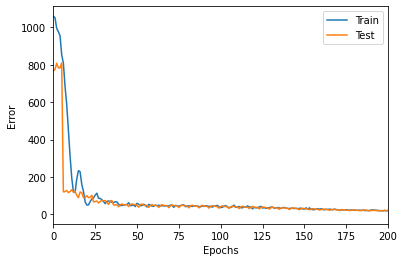

In [35]:
plt.xlim(0, 200)
plt.plot(range(len(train_loss_list)), train_loss_list, label="Train")
plt.plot(range(len(val_loss_list)), val_loss_list, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [37]:
import seaborn
def test():
    test_net.eval()
    running_loss = 0
    with torch.no_grad():
        total_max_temp_error = 0
        total_min_temp_error = 0
        max_error_x = 0
        max_error_y = 0
        min_error_x = 0
        min_error_y = 0
        error_per_pix = 0
        loss_sum = 0
        max_error_x_abs = 0
        max_error_y_abs = 0
        min_error_x_abs = 0
        min_error_y_abs = 0
            
        estimate_list = []

        for batch_idx, (x, c) in enumerate(test_loader):
            estimate_start = time.time()
            print('=================================')
            x, c = tmp.next()
            x = x.to(device)
            c = c.to(device)
            y = model(x)
            estimate_end = time.time()
            estimate_duration = -estimate_start+estimate_end
            print("{}個目のモデルの推定時間は：{}秒です".format(batch_idx+1, estimate_duration))
            estimate_list.append(estimate_duration)
            continue
            loss = criterion(y, c)
            loss_unit = torch.sum(torch.abs(y-c))/16/18
            loss_sum = loss_sum + loss_unit
            running_loss += loss.item()
            
            
            y = y.cpu()
            c = c.cpu()
            c_reshaped = c.reshape(16, 18)
            seaborn.heatmap(c_reshaped, vmin=18, vmax=25)
            plt.show()
            y_reshaped = y.reshape(16, 18)
            seaborn.heatmap(y_reshaped, vmin=18, vmax=25)
            plt.show()
            
            #最高温度のずれ
            max_temp_output = torch.max(c)
            max_temp_target = torch.max(y)
            max_temp_error = max_temp_output - max_temp_target
            total_max_temp_error = total_max_temp_error + max_temp_error

            #最低温度のずれ
            min_temp_output = torch.min(c)
            min_temp_target = torch.min(y)
            min_temp_error = min_temp_output - min_temp_target
            total_min_temp_error = total_min_temp_error + min_temp_error

            #最高温度を示すピクセルの座標のずれ(絶対値)
            max_temp_arg = torch.argmax(c)
            max_x_output = (max_temp_arg + 1)%18 -1
            max_y_output = -(max_temp_arg + 1)//18

            max_temp_arg = torch.argmax(y)
            max_x_target = (max_temp_arg + 1)%18 -1
            max_y_target = -(max_temp_arg + 1)//18
            
            max_error_x = max_error_x + abs(max_x_output - max_x_target)
            max_error_y = max_error_y + abs(max_y_output - max_y_target)

            # 最低温度を示すピクセルの座標のずれ(絶対値)
            min_temp_arg = torch.argmin(c)
            min_x_output = (min_temp_arg + 1)%18 -1
            min_y_output = -(min_temp_arg + 1)//18

            min_temp_arg = torch.argmin(y)
            min_x_target = (min_temp_arg + 1)%18 -1
            min_y_target = -(min_temp_arg + 1)//18
            
            min_error_x = min_error_x + abs(min_x_output - min_x_target)
            min_error_y = min_error_y + abs(min_y_output - min_y_target)

    print("平均時間は{}秒です".format(sum(estimate_list)/len(estimate_list)))
    return 0

    print('1ピクセルあたりの誤差', loss_sum/len(test_loader))
    print('最高温度のずれ', total_max_temp_error/len(test_loader))      
    print('最低温度のずれ', total_min_temp_error/len(test_loader))
    print('最高温度を示すピクセルの座標のずれ', max_error_x_abs/len(test_loader), max_error_y_abs/len(test_loader), )
    print('最低温度を示すピクセルの座標のずれ', min_error_x_abs/len(test_loader), min_error_y_abs/len(test_loader), )
    
    print("batch_size: {}　です。頑張ってください".format(batchsize))
    print(fpath)
    p = [loss_sum/len(test_loader), total_max_temp_error/len(test_loader), total_min_temp_error/len(test_loader), max_error_x/len(test_loader), max_error_y/len(test_loader), min_error_x/len(test_loader), min_error_y/len(test_loader), max_error_x_abs/len(test_loader), max_error_y_abs/len(test_loader), min_error_x_abs/len(test_loader), min_error_y_abs/len(test_loader), best_epoch]
    p = [float(x) for x in p]
    p.insert(0, "条件"+str(histwindow))
    print(*p, sep=', ')

    val_loss = running_loss / len(test_loader)

/tmp/ipykernel_555829/28203880.py:60: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_output = (max_temp_arg + 1)//18
/tmp/ipykernel_555829/28203880.py:64: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_target = (max_temp_arg + 1)//18
/tmp/ipykernel_555829/28203880.py:75: UserWarning: __floordiv__ is deprecated, and its behav

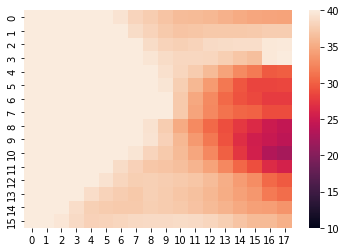

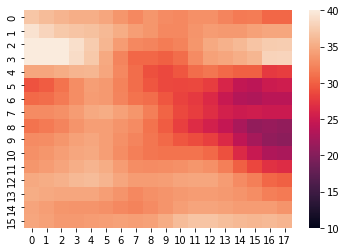

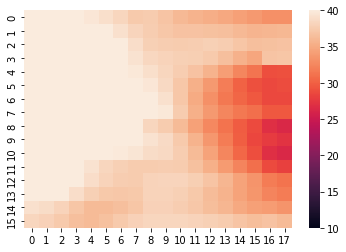

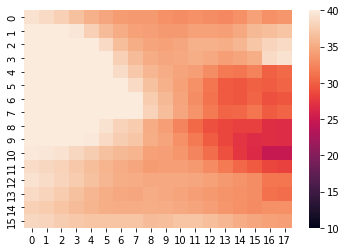

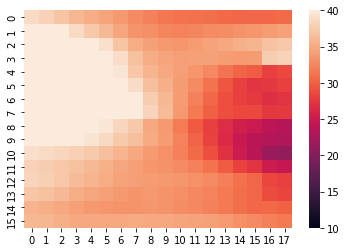

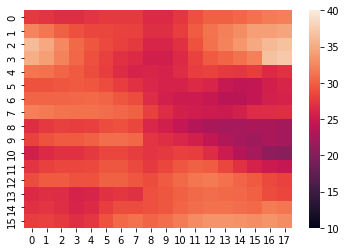

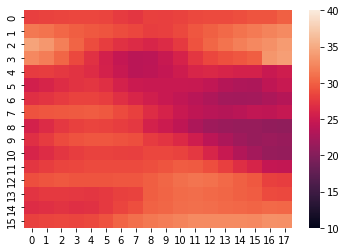

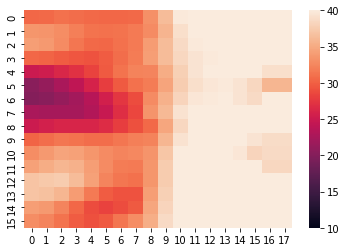

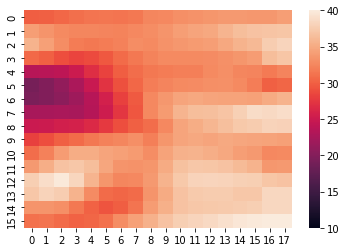

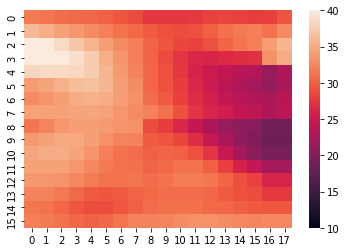

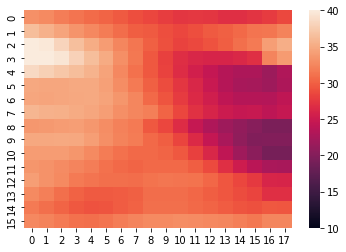

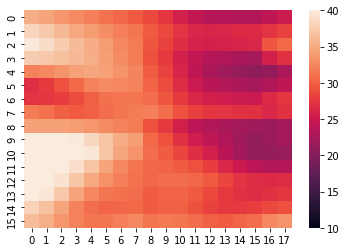

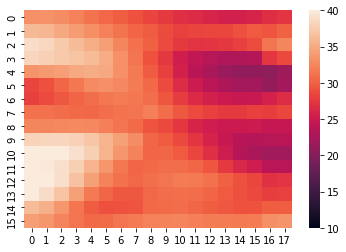

1ピクセルあたりの誤差 tensor(1.8052, device='cuda:0')
最高温度のずれ tensor(1.8759)
最低温度のずれ tensor(-0.1758)
最高温度を示すピクセルの座標のずれ tensor(-0.3000) tensor(1.7000)
最低温度を示すピクセルの座標のずれ tensor(0.4000) tensor(3.2000)
abs最高温度を示すピクセルの座標のずれ tensor(0.7000) tensor(2.1000)
abs最低温度を示すピクセルの座標のずれ tensor(1.) tensor(3.6000)


In [38]:
test()